<img src="https://miro.medium.com/max/629/1*xLKdaL_RFhqFuy1iKSXvXA.png">

# Decision Trees
**Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier**

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm2.png">

# Titanic Project

<img src = "https://media.nationalgeographic.org/assets/photos/000/273/27302_c0-41-990-701_r1050x700.jpg?d4ccf3044d9da0d0118103be3a76bd1319370847">

**Build decision tree model to predict survival based on certain paramters**

In [1]:
import pandas as pd 
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
inputs = df.drop(['PassengerId', 'Name', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns')
inputs.drop('Survived', axis=1, inplace=True)
inputs 

,Pclass,Sex,Age,SibSp,Fare
0,3,male,22.0,1,7.2500
1,1,female,38.0,1,71.2833
2,3,female,26.0,0,7.9250
3,1,female,35.0,1,53.1000
4,3,male,35.0,0,8.0500
...,...,...,...,...,...
886,2,male,27.0,0,13.0000
887,1,female,19.0,0,30.0000
888,3,female,NaN,1,23.4500
889,1,male,26.0,0,30.0000


In [3]:
target = df['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
sex = LabelEncoder()
inputs['Sex_n'] = sex.fit_transform(inputs['Sex'])
inputs


,Pclass,Sex,Age,SibSp,Fare,Sex_n
0,3,male,22.0,1,7.2500,1
1,1,female,38.0,1,71.2833,0
2,3,female,26.0,0,7.9250,0
3,1,female,35.0,1,53.1000,0
4,3,male,35.0,0,8.0500,1
...,...,...,...,...,...,...
886,2,male,27.0,0,13.0000,1
887,1,female,19.0,0,30.0000,0
888,3,female,NaN,1,23.4500,0
889,1,male,26.0,0,30.0000,1


In [5]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
inputs['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [7]:
mean = inputs.Age.mean()
inputs.Age = inputs.Age.fillna(mean)
inputs["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [8]:
inputs.isna()

,Pclass,Sex,Age,SibSp,Fare,Sex_n
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,False,False,False,False,False,False
889,False,False,False,False,False,False


In [9]:
inputs.drop('Sex', axis=1, inplace = True)

In [10]:
inputs

,Pclass,Age,SibSp,Fare,Sex_n
0,3,22.000000,1,7.2500,1
1,1,38.000000,1,71.2833,0
2,3,26.000000,0,7.9250,0
3,1,35.000000,1,53.1000,0
4,3,35.000000,0,8.0500,1
...,...,...,...,...,...
886,2,27.000000,0,13.0000,1
887,1,19.000000,0,30.0000,0
888,3,29.699118,1,23.4500,0
889,1,26.000000,0,30.0000,1


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [12]:
len(x_train)

712

In [24]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [25]:
p =  model.score(x_test, y_test)
print(f"Precent accuracy - {p*100}%")

Precent accuracy - 77.6536312849162%


In [26]:
model.predict([[3,20,1,70,1]])

array([0], dtype=int64)

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt

In [33]:
fig = plt.figure(figsize=(1,1))


<Figure size 72x72 with 0 Axes>

[Text(108.70740551583249, 213.25846153846155, 'X[4] <= 0.5\ngini = 0.476\nsamples = 712\nvalue = [434, 278]'),
 Text(57.19642492339122, 204.89538461538461, 'X[0] <= 2.5\ngini = 0.374\nsamples = 257\nvalue = [64, 193]'),
 Text(17.783043922369767, 196.53230769230768, 'X[1] <= 2.5\ngini = 0.097\nsamples = 137\nvalue = [7, 130]'),
 Text(12.311338100102146, 188.16923076923078, 'X[3] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(9.575485188968335, 179.80615384615385, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(15.047191011235956, 179.80615384615385, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(23.254749744637387, 188.16923076923078, 'X[3] <= 29.356\ngini = 0.085\nsamples = 135\nvalue = [6, 129]'),
 Text(20.518896833503575, 179.80615384615385, 'X[1] <= 56.0\ngini = 0.204\nsamples = 52\nvalue = [6, 46]'),
 Text(17.783043922369767, 171.44307692307692, 'X[3] <= 28.231\ngini = 0.177\nsamples = 51\nvalue = [5, 46]'),
 Text(15.047191011235956, 163.07999999999998, 'X[2] <= 0

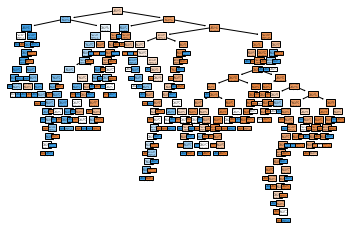

In [34]:
tree.plot_tree(model,filled = True)